In [5]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#create a set of longitude and Latitude values
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
#pack both lats and long as a pair
lat_lngs=zip(lats,lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-25.14139851468073 -80.01387415540265
61.6070406988523 -21.81938488353849
-13.919337259051204 11.657871281076396
-80.01600086905954 72.33885479426084
-41.25914234432864 -24.954463033712997
-10.81129204803949 -44.462281744177304
-8.43850548158477 18.77495042768207
-51.04967500638577 87.83617854733029
34.92044317494094 80.13948786910339
-61.09789532597538 59.69719449278077
-56.86570913221736 -42.02846047198114
41.82509797675664 -79.91362309631401
-74.82707872722628 -62.91167093972862
-12.03571618583966 68.41089287569042
33.53120609540902 83.57390166069024
54.015069688909364 17.1554450007782
41.254822599356004 -85.06457033678663
46.01512994282194 -70.85339001535498
38.03456780522353 -32.51549012318348
-89.74784367514908 -41.31290190960304
-73.32262575845962 16.87828079503602
7.366169679162141 5.261244530410892
85.52588923006937 -38.76739125732301
-81.76947914271756 38.82616820585872
85.6890918653441 30.245206531169046
74.50252273437141 4.662558275549941
74.24279435780852 29.52715316729474

-62.00695480962025 37.59098673193094
-73.31917479003542 52.01451149356208
30.34459350310503 -42.773124326922535
-72.73122796067413 88.41788632960092
70.51558038133427 -31.779378122354927
15.38259631974185 9.10091040978611
66.85258153547338 19.215182271817497
0.8748338701753227 -40.08131661799703
-68.5891317934957 -36.363960324959386
-18.199885249091253 -47.31453424150695
-20.200581321328755 51.565960006477724
35.35643598961978 -43.31038094819289
9.752444213632614 -32.18071102278006
31.55333889521532 -11.935533533116882
89.1977472692258 49.77720854780455
21.93018843994119 -71.39805857844368
89.5410202386978 69.75039078476041
-0.33994283188128804 -33.81929775080115
67.55216817715501 -35.49193483164115
40.69276866519786 1.9408687426362832
6.441451880136981 26.612623658275766
57.990687085588775 14.052102569410934
-46.71788786007078 87.05112100333974
74.16682855266097 -79.27143217072805
-51.67263084493779 63.12274431842454
35.150536132739546 3.0560581286599273
40.084475236392194 31.01253097

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [11]:
#import the requests library
import requests
#import the API key
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=945fbd1889f2a43a87541db8c3b1fd2f


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | grindavik
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | formosa do rio preto
Processing Record 7 of Set 1 | lucapa
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | leh
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | meadville
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | jumla
Processing Record 15 of Set 1 | miastko
Processing Record 16 of Set 1 | auburn
Processing Record 17 of Set 1 | beauceville
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ikere
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | port alfr

Processing Record 36 of Set 4 | saint george
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | zhezkazgan
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | praia da vitoria
Processing Record 41 of Set 4 | vanersborg
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | shetpe
Processing Record 44 of Set 4 | lavumisa
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | groningen
Processing Record 47 of Set 4 | zhanaozen
Processing Record 48 of Set 4 | vila franca do campo
Processing Record 49 of Set 4 | le port
Processing Record 50 of Set 4 | turukhansk
Processing Record 1 of Set 5 | laguna
Processing Record 2 of Set 5 | burgeo
Processing Record 3 of Set 5 | kalat
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | vestmanna
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | takoradi
Processing Record 8 of Set 5 | sinnamary
Processing 

Processing Record 28 of Set 8 | lebu
Processing Record 29 of Set 8 | jalu
Processing Record 30 of Set 8 | douglas
Processing Record 31 of Set 8 | arroyo
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | bay roberts
Processing Record 34 of Set 8 | trincomalee
Processing Record 35 of Set 8 | pimenta bueno
Processing Record 36 of Set 8 | acurenam
Processing Record 37 of Set 8 | turbat
Processing Record 38 of Set 8 | yershov
Processing Record 39 of Set 8 | sovetskiy
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | peremyshlyany
Processing Record 42 of Set 8 | sacile
Processing Record 43 of Set 8 | boende
Processing Record 44 of Set 8 | comodoro rivadavia
Processing Record 45 of Set 8 | obo
Processing Record 46 of Set 8 | stornoway
Processing Record 47 of Set 8 | carnarvon
Processing Record 48 of Set 8 | bereda
Processing Record 49 of Set 8 | rosario
Processing Record 50 of Set 8 | lagos
Processing Record 1 of Set 9 | atar
Processing Record 2 of 

Processing Record 17 of Set 12 | abu kamal
Processing Record 18 of Set 12 | lasa
Processing Record 19 of Set 12 | somerset east
Processing Record 20 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 21 of Set 12 | nelson
Processing Record 22 of Set 12 | boueni
Processing Record 23 of Set 12 | san lawrenz
Processing Record 24 of Set 12 | autazes
Processing Record 25 of Set 12 | araua
Processing Record 26 of Set 12 | bulanash
Processing Record 27 of Set 12 | abomsa
Processing Record 28 of Set 12 | kuche
City not found. Skipping...
Processing Record 29 of Set 12 | gambela
Processing Record 30 of Set 12 | semnan
Processing Record 31 of Set 12 | kondinskoye
Processing Record 32 of Set 12 | chulym
Processing Record 33 of Set 12 | longlac
City not found. Skipping...
Processing Record 34 of Set 12 | oistins
Processing Record 35 of Set 12 | statesboro
Processing Record 36 of Set 12 | vlcnov
Processing Record 37 of Set 12 | riyadh
Processing Record 38 of Set 12 | krasnokholm
Pro

In [37]:
len(city_data)

562

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.4000,-70.4833,59.83,66,13,5.57,CL,2022-09-25 23:38:31
1,Grindavik,63.8424,-22.4338,44.55,81,20,6.91,IS,2022-09-25 23:38:17
2,Namibe,-15.1961,12.1522,63.23,74,85,8.66,AO,2022-09-25 23:38:32
3,Arraial Do Cabo,-22.9661,-42.0278,69.03,81,32,18.10,BR,2022-09-25 23:38:13
4,Formosa Do Rio Preto,-11.0483,-45.1931,79.41,54,67,3.85,BR,2022-09-25 23:35:31
5,Lucapa,-8.4192,20.7447,69.49,70,100,1.12,AO,2022-09-25 23:38:32
6,Busselton,-33.6500,115.3333,54.43,77,0,4.81,AU,2022-09-25 23:38:33
7,Leh,34.1667,77.5833,42.39,94,100,3.60,IN,2022-09-25 23:38:33
8,Mar Del Plata,-38.0023,-57.5575,55.09,95,100,9.22,AR,2022-09-25 23:38:21
9,Meadville,41.6414,-80.1515,58.57,95,100,6.91,US,2022-09-25 23:38:33


In [39]:
new_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taltal,CL,2022-09-25 23:38:31,-25.4000,-70.4833,59.83,66,13,5.57
1,Grindavik,IS,2022-09-25 23:38:17,63.8424,-22.4338,44.55,81,20,6.91
2,Namibe,AO,2022-09-25 23:38:32,-15.1961,12.1522,63.23,74,85,8.66
3,Arraial Do Cabo,BR,2022-09-25 23:38:13,-22.9661,-42.0278,69.03,81,32,18.10
4,Formosa Do Rio Preto,BR,2022-09-25 23:35:31,-11.0483,-45.1931,79.41,54,67,3.85


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [63]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

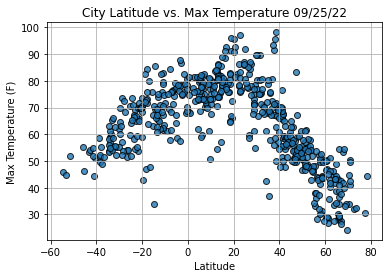

In [64]:
#import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

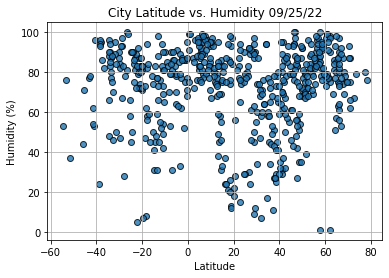

In [65]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

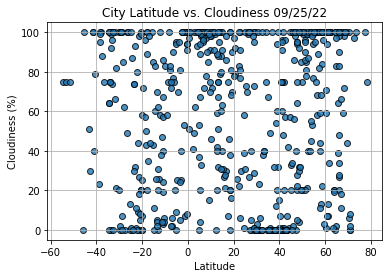

In [66]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

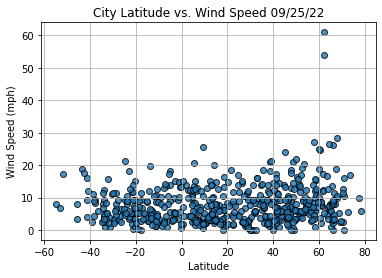

In [67]:
# Build the scatter plot for latitude vs. Wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()